# Ejercicios Aprendizaje Automático

### 1. Reglas de asociación
En el “groceries.csv” contiene las transacciones recogidas durante un mes en una tienda de
comestibles. En cada una de las filas de este archivo se encuentran los artículos comprados de
forma conjunta por los diferentes clientes. Obtener las lista de artículos que tiene un soporte
mínimo de 0,15. Obtener también las reglas de asociación que se pueden deducir de este
conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

La importación del archivo se puede realizar utilizando el siguiente código:

    import csv
    groceries = []
    groceries_file = csv.reader(open("groceries.csv", "rb"))
    for row in groceries_file:
        groceries.append(row)


In [1]:
import csv
import apriori
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import numpy
from numpy import array
from numpy import unique
import math
from math import *
import matplotlib.pyplot as plt

In [2]:
groceries = []
groceries_file = csv.reader(open("groceries.csv", "rb"))
for row in groceries_file:
    groceries.append(row)
    
groceries[:10]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals']]

### Obtener las lista de artículos que tiene un soporte mínimo de 0,15

Mostraremos los articulos que tienen una frecuencia de soporte minimo del 15%, es decir aparecen en el 15% de las listas.

In [3]:
F, soporte = apriori.apriori(groceries, min_support=0.15, verbose=True)

{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{rolls/buns}:  sup = 0.184


### Obtener también las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

Al bajar el minimo de soporte, la lista se amplia y el resultado es mayor

In [4]:
F, soporte = apriori.apriori(groceries, min_support=0.05, verbose=True)

{citrus fruit}:  sup = 0.083
{curd}:  sup = 0.053
{root vegetables}:  sup = 0.109
{shopping bags}:  sup = 0.099
{bottled beer}:  sup = 0.081
{butter}:  sup = 0.055
{newspapers}:  sup = 0.08
{napkins}:  sup = 0.052
{pip fruit}:  sup = 0.076
{domestic eggs}:  sup = 0.063
{bottled water}:  sup = 0.111
{tropical fruit}:  sup = 0.105
{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{canned beer}:  sup = 0.078
{frankfurter}:  sup = 0.059
{sausage}:  sup = 0.094
{yogurt}:  sup = 0.14
{pastry}:  sup = 0.089
{margarine}:  sup = 0.059
{coffee}:  sup = 0.058
{brown bread}:  sup = 0.065
{fruit/vegetable juice}:  sup = 0.072
{whipped/sour cream}:  sup = 0.072
{pork}:  sup = 0.058
{rolls/buns}:  sup = 0.184
{beef}:  sup = 0.052
{whole milk, yogurt}:  sup = 0.056
{whole milk, rolls/buns}:  sup = 0.057
{whole milk, other vegetables}:  sup = 0.075


A partir de los articulos frecuentes, le especificamos la confianza  minima

In [5]:
H = apriori.generate_rules(F, soporte, min_confidence=0.25, verbose=True)

{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056
{rolls/buns} ---> {whole milk}:  conf = 0.308, sup = 0.057
{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075
{whole milk} ---> {other vegetables}:  conf = 0.293, sup = 0.075


** Con los parametros de Soporte de 5% y confianza de 25% el resultado es:**

Que el 40% de las veces que se compra yogurt tambien se compra Whole milk..</p>
**{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056**

EL 30% de veces que se compra rolls/buns se compra Whoe milk..</p>
**{rolls/buns} ---> {whole milk}:  conf = 0.308, sup = 0.057**

El 38% de veces que de compran "other vegetables" tambien se compra whole milk</p>
**{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075**

El 29% de veces que de compra while milk tambien se compran "other vegetables"</p>
**{whole milk} ---> {other vegetables}:  conf = 0.293, sup = 0.075**



# 2. Implementación de una regresión “stepwise” con eliminación hacia atrás.

Utilizando como referencia el código del algoritmo “stepwise” con selección hacia adelante
(Fordward Stepwise Regression) que se encuentra en el archivo “CIF005_02_06_Stepwise.ipynb”
realizar una implementación del del algoritmo con eliminación hacia atrás (Backward Stepwise
Regression). En este caso la selección de las variables se realiza empezando con un modelo que
utiliza todas la variables disponibles para ir eliminando en cada paso la produce el modelo menos
significativo.

In [6]:
wine = pd.read_csv('winequality-white.csv', sep = ';')
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Preparación de los datos
Se divide el conjunto de variables en uno de prueba y otra test. 

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# Separación de la variable objetivo y las explicativas
target = 'quality'
features = list(wine.columns)
features.remove('quality')

x = wine[features]
y = wine[target]

# Obtencion del conjunto de datos para validación
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [8]:
from sklearn.linear_model import LinearRegression
import numpy
import math

# Modelo para realizar los ajustes
model = LinearRegression()

# Determinamos el tamano de todas las variables a eliminar 
feature_order = range(len(features))

feature_error = []
feature_range = []

for i in range(len(features)-1):
    idx_try = [val for val in range(len(features)) if val in feature_order]
    iter_error = []

    for i_try in idx_try:
        useRow = feature_order[:]
        useRow.remove(i_try)

        use_train = x_train[x_train.columns[useRow]]
        use_test = x_test[x_train.columns[useRow]]

        model.fit(use_train, y_train)
        rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/math.sqrt(len(y_test))
        iter_error.append(rmsError)

    pos_best = numpy.argmin(iter_error)

    # Eliminando variables 1 a 1
    feature_order.remove(idx_try[pos_best])
    feature_range.append(idx_try[pos_best])
    feature_error.append(iter_error[pos_best])

for i in range(len(features)-1):
    print "En el paso", i, "se ha eliminado la varible", features[feature_range[i]], "con un error", feature_error[i]

En el paso 0 se ha eliminado la varible citric acid con un error 0.748952431769
En el paso 1 se ha eliminado la varible fixed acidity con un error 0.748844539065
En el paso 2 se ha eliminado la varible total sulfur dioxide con un error 0.748808240723
En el paso 3 se ha eliminado la varible chlorides con un error 0.748819885017
En el paso 4 se ha eliminado la varible free sulfur dioxide con un error 0.749937784547
En el paso 5 se ha eliminado la varible pH con un error 0.752672490575
En el paso 6 se ha eliminado la varible sulphates con un error 0.757481635799
En el paso 7 se ha eliminado la varible density con un error 0.761166586028
En el paso 8 se ha eliminado la varible residual sugar con un error 0.769361942282
En el paso 9 se ha eliminado la varible volatile acidity con un error 0.780840030902


# 3. Estimación de la supervivencia de los pasajeros del Titanic.
Utilizando los datos del archivo “titanic.csv”, que contienen información del pasaje del Titanic, para
la creación de un modelo que pueda predecir si un pasajero sobrevive al hundimiento del barco en
el momento de embarque. Para esto se han de seleccionar la variables con mayor capacidad de
predicción.

Para la creación del modelo no se pueden utilizar las variables “boat” ni “body” ya que estas
contienen información posterior al momento del embarque.

En el conjunto de datos existes valores NaN en las columnas “age” y “fare”, para eliminar las filas
con estos valores se puede utilizar el siguiente comando:

    mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))</p>
    titanic = titanic[-mask.any(axis = 1)]

In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

titanic = pd.read_csv("titanic.csv")
titanic.head(10)
len(titanic.index)

1309

Eliminando valores NAN, eliminando columnas “boat” y “body

In [10]:
mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
titanic = titanic[-mask.any(axis = 1)]
titanic = titanic.drop(['boat','body'], axis=1)
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [11]:
len(titanic.index)

1045

In [12]:
titanic.columns

Index([u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked', u'home.dest'],
      dtype='object')

## Clasificacion y eliminacion de variables

Analizando las variables, se eliminan variables identificadores, que a mi entender no aportan al modelo **(name, ticket, cabin, embarked y home.dest)**, ademas clasificamos las variables en categorias y continuas.

In [13]:
var_categoricas = ['pclass','sex','sibsp','parch','embarked' ]
var_numericas   = ['age','fare']
var_target      = titanic['survived'] == 1

## Análisis de las variables discretas

In [14]:
def calculo_frecuencias():
    for var in var_categoricas:
        print "Tabla de frecuencias para:", var
        print pd.crosstab(titanic['survived'], titanic[var])
        print

In [15]:
calculo_frecuencias()

Tabla de frecuencias para: pclass
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

Tabla de frecuencias para: sex
sex       female  male
survived              
0             96   522
1            292   135

Tabla de frecuencias para: sibsp
sibsp       0    1   2   3   4  5  8
survived                            
0         429  133  20  10  19  6  1
1         255  147  16   6   3  0  0

Tabla de frecuencias para: parch
parch       0   1   2  3  4  5  6
survived                         
0         497  65  42  3  4  5  2
1         270  95  55  5  1  1  0

Tabla de frecuencias para: embarked
embarked    C   Q    S
survived              
0          80  37  501
1         132  13  280



#### Vemos capacidad predictica WoE

In [16]:
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    
    print "Obteniendo el Woe para la variable", var, ":"
    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es infinito"
        else:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1]))
            

Analisis de pclass

In [17]:
get_WoE(titanic, 'pclass', 'survived')

Obteniendo el Woe para la variable pclass :
  El WoE para 1 [ 284 ] es -0.563768043036
  El WoE para 2 [ 261 ] es 0.238674493345
  El WoE para 3 [ 500 ] es 1.03559932084


Analisis de sex

In [18]:
get_WoE(titanic, 'sex', 'survived')

Obteniendo el Woe para la variable sex :
  El WoE para female [ 388 ] es -1.1124056108
  El WoE para male [ 657 ] es 1.35239280944


Analisis de sibsp

In [19]:
get_WoE(titanic, 'sibsp', 'survived') 

Obteniendo el Woe para la variable sibsp :
  El WoE para 0 [ 684 ] es 0.52019337377
  El WoE para 1 [ 280 ] es -0.100083458557
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 3 [ 16 ] es 0.510825623766
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para 5 [ 6 ] es infinito
  El WoE para 8 [ 1 ] es infinito


Para este caso se pueden unificar: **Niveles 1, 5, con el 8, Nivel 0, 2 y 3 con el 4.**

In [20]:
titanic.loc[:, 'sibsp_WOE'] = None

for row in titanic.index:
    if titanic.loc[row, 'sibsp'] in (1, 5, 8):
        titanic.loc[row, 'sibsp_WOE'] = 'n0'
    elif titanic.loc[row, 'sibsp'] in (0, 3, 2, 4):
        titanic.loc[row, 'sibsp_WOE'] = 'n1'
    else:
        val = titanic.loc[row, 'sibsp']
        titanic.loc[row, 'sibsp_WOE'] = val

get_WoE(titanic, 'sibsp_WOE', 'survived') 
var_categoricas = ['pclass', 'sibsp_WOE', 'parch', 'sex', 'embarked'] #modifico mi lista de variables de estudio.

Obteniendo el Woe para la variable sibsp_WOE :
  El WoE para n0 [ 287 ] es -0.0487901641694
  El WoE para n1 [ 758 ] es 0.534821129322


Analisis de parch

In [21]:
woe = get_WoE(titanic, 'parch', 'survived') 

Obteniendo el Woe para la variable parch :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para 1 [ 160 ] es -0.379489621705
  El WoE para 2 [ 97 ] es -0.269663566949
  El WoE para 3 [ 8 ] es -0.510825623766
  El WoE para 4 [ 5 ] es 1.38629436112
  El WoE para 5 [ 6 ] es 1.60943791243
  El WoE para 6 [ 2 ] es infinito


Para este caso se pueden unificar: ** Niveles 1, 2 y 3 con nivel 6, El nivel 4 con 5.**

In [22]:
titanic.loc[:, 'parch_WOE_T'] = None

for row in titanic.index:
    if titanic.loc[row, 'parch'] in (1, 2, 3, 6):
        titanic.loc[row, 'parch_WOE_T'] = 'n0'
    elif titanic.loc[row, 'parch'] in (4,5):
        titanic.loc[row, 'parch_WOE_T'] = 'n1'
    else:
        val = titanic.loc[row, 'parch']
        titanic.loc[row, 'parch_WOE_T'] = val

get_WoE(titanic, 'parch_WOE_T', 'survived')
var_categoricas = ['pclass', 'sibsp_WOE_T', 'parch_WOE', 'sex', 'embarked'] #modifico mi lista de variables de estudio.

Obteniendo el Woe para la variable parch_WOE_T :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para n0 [ 267 ] es -0.324926245624
  El WoE para n1 [ 11 ] es 1.50407739678


Aun podemos unificar el 0 con el n1, por ser positivos.

In [23]:
titanic.loc[:, 'parch_WOE'] = None
titanic.loc[:, 'parch_WOE'] = titanic['parch_WOE_T'].map(lambda x: 'n0' if x == 'n0' else 'n1')
get_WoE(titanic, 'parch_WOE', 'survived') 
var_categoricas = ['pclass', 'sibsp_WOE', 'parch_WOE', 'sex', 'embarked'] #modifico mi lista de variables de estudio.

Obteniendo el Woe para la variable parch_WOE :
  El WoE para n0 [ 267 ] es -0.324926245624
  El WoE para n1 [ 778 ] es 0.620734602991


Analisis de Embarked

In [24]:
get_WoE(titanic, 'embarked', 'survived')

Obteniendo el Woe para la variable embarked :
  El WoE para C [ 212 ] es -0.500775287912
  El WoE para Q [ 50 ] es 1.04596855518
  El WoE para S [ 781 ] es 0.581816497916


Agrupo niveles Q y S porque ser postivos y Q tener pocos registros

In [25]:
titanic.loc[:, 'embarked_WOE'] = None
titanic.loc[:, 'embarked_WOE'] = titanic['embarked'].map(lambda x: 'C' if x == 'C' else 'n1')

get_WoE(titanic, 'embarked_WOE', 'survived')
var_categoricas = ['pclass', 'sibsp_WOE', 'parch_WOE', 'sex', 'embarked_WOE'] #modifico mi lista de variables de estudio.

Obteniendo el Woe para la variable embarked_WOE :
  El WoE para C [ 212 ] es -0.500775287912
  El WoE para n1 [ 833 ] es 0.600883203822


In [26]:
calculo_frecuencias()

Tabla de frecuencias para: pclass
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

Tabla de frecuencias para: sibsp_WOE
sibsp_WOE   n0   n1
survived           
0          140  478
1          147  280

Tabla de frecuencias para: parch_WOE
parch_WOE   n0   n1
survived           
0          112  506
1          155  272

Tabla de frecuencias para: sex
sex       female  male
survived              
0             96   522
1            292   135

Tabla de frecuencias para: embarked_WOE
embarked_WOE    C   n1
survived              
0              80  538
1             132  295



## Analisis de las variables continuas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C4DE3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C707748>]], dtype=object)

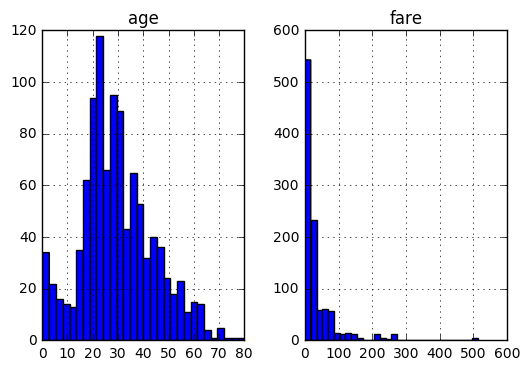

In [27]:
%matplotlib inline
titanic[var_numericas].hist(bins=30)

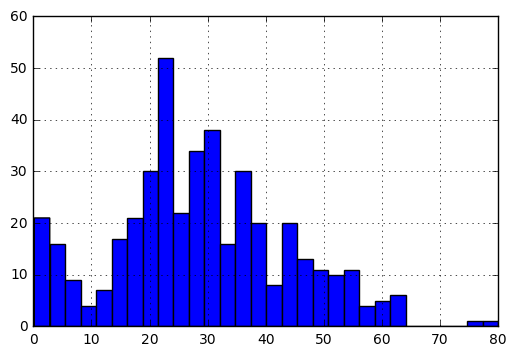

In [28]:
titanic['age'][var_target].hist(bins=30)

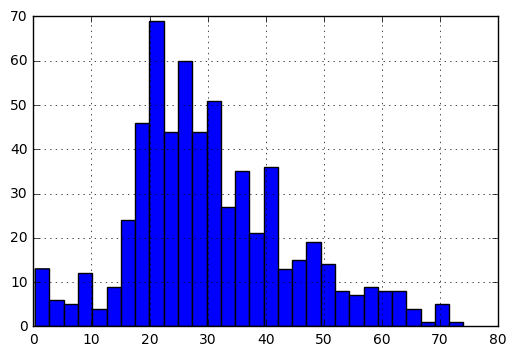

In [29]:
titanic['age'][var_target==False].hist(bins=30)

Se observan 3 grupos: ** Entre los 0 y 16 años, Entre los 17 y 40 años y A partir de los 40 Años **

In [30]:
titanic.loc[:, 'age_VC'] = titanic['age'].map(lambda x: 'n0' if x < 17 else 'n1' if x < 40 else 'n2')

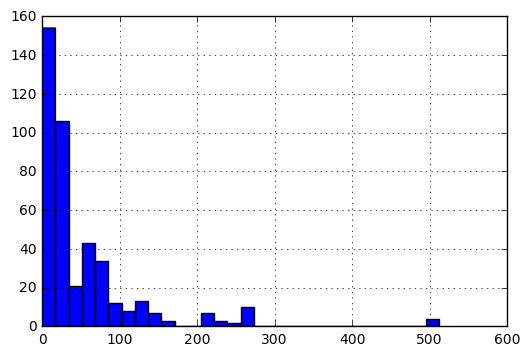

In [31]:
titanic['fare'][var_target].hist(bins=30)

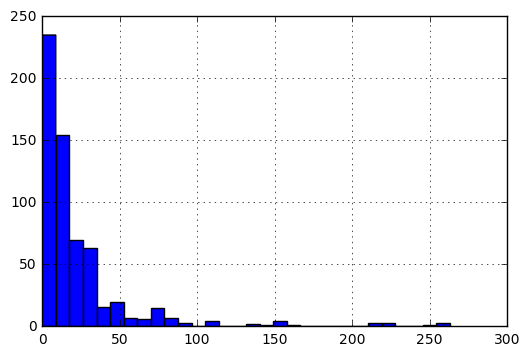

In [32]:
titanic['fare'][var_target==False].hist(bins=30)

Se observan 3 grupos: ** Entre los 0 y 40, Entre los 40 y 100, A partir de los 100 **

In [33]:
titanic.loc[:, 'fare_VC'] = titanic['fare'].map(lambda x: 'n0' if x < 40 else 'n1' if x < 100 else 'n2')

Modificacion de las variables a estudiar

In [34]:
var_categoricas = ['pclass', 'sex', 'embarked_WOE', 'sibsp_WOE', 'parch_WOE', 'age_VC', 'fare_VC']
var_continuas = []
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,sibsp_WOE,parch_WOE_T,parch_WOE,embarked_WOE,age_VC,fare_VC
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO",n1,0,n1,n1,n1,n2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",n0,n0,n0,n1,n0,n2
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",n0,n0,n0,n1,n0,n2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",n0,n0,n0,n1,n1,n2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",n0,n0,n0,n1,n1,n2


In [35]:
calculo_frecuencias()

Tabla de frecuencias para: pclass
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

Tabla de frecuencias para: sex
sex       female  male
survived              
0             96   522
1            292   135

Tabla de frecuencias para: embarked_WOE
embarked_WOE    C   n1
survived              
0              80  538
1             132  295

Tabla de frecuencias para: sibsp_WOE
sibsp_WOE   n0   n1
survived           
0          140  478
1          147  280

Tabla de frecuencias para: parch_WOE
parch_WOE   n0   n1
survived           
0          112  506
1          155  272

Tabla de frecuencias para: age_VC
age_VC    n0   n1   n2
survived              
0         60  410  148
1         74  257   96

Tabla de frecuencias para: fare_VC
fare_VC    n0  n1  n2
survived             
0         534  62  22
1         276  94  57



## Creación de un modelo con variables discretizadas
Seleccionando variablaes con Information Value (IV)

In [36]:
from sklearn.linear_model.logistic import LogisticRegression

valoresIV = []

for v_cat in var_categoricas:
    var_target = array(var_target)
    var_values = array(titanic[v_cat])
    var_levels = unique(var_values)

    mat_values = numpy.zeros(shape=(len(var_levels),2))

    for i in range(len(var_target)):
        for j in range(len(var_levels)):
            if var_levels[j] == var_values[i]:
                pos = j
                break

        if var_target[i]:
            mat_values[pos][0] += 1
        else:
            mat_values[pos][1] += 1

        # Calculando IV
        IV = 0
        for j in range(len(var_levels)):
            if mat_values[j][0] > 0 and mat_values[j][1] > 0:
                rt = mat_values[j][0] / (mat_values[j][0] + mat_values[j][1])
                rf = mat_values[j][1] / (mat_values[j][0] + mat_values[j][1])
                IV += (rt - rf) * np.log(rt / rf)

    # Se agrega el IV al listado
    valoresIV.append(IV)

for i in range(len(var_categoricas)):
    print "La variable", var_categoricas[i], "el IV es", valoresIV[i]


La variable pclass el IV es 0.67613129015
La variable sex el IV es 1.35855179749
La variable embarked_WOE el IV es 0.298119331691
La variable sibsp_WOE el IV es 0.140892620898
La variable parch_WOE el IV es 0.239028042454
La variable age_VC el IV es 0.221302358608
La variable fare_VC el IV es 0.717362913482


Segun la tabal proporcionada en clase, los valores por encima del 0.3, son las que tienen fuerte y muy fuerte capacidad de clasifiacion.

Por tal motivo, este modelo tiene las siguientes variable: ** CLASS, SEX y FARE_VC **

Por lo tanto se actualiza la lisa para las variables de estudio

In [37]:
var_categoricas = ['pclass','sex', 'fare_VC' ] #actualizo mi lista de variables de estudio.

## Obtención del valor del VIF
Culcular el valor del VIF para todas las variables menos la objetivo. Para esto se realiza una regresión lineal de cada una de las variables frente al resto y aplicamos la fórmula del VIF 

Creamos dummies ya que las variables que tenemos son discretizadas

In [38]:
titanic_dummie = titanic[['pclass','sex', 'fare_VC','survived']]
for column in var_categoricas:
    dummie = pd.get_dummies(titanic_dummie[column], prefix = column)
    names = list(dummie.columns)
    names.remove(names[0])
    titanic_dummie = pd.concat([titanic_dummie, dummie[names]], axis = 1)
    names = list(titanic_dummie.columns)
    names.remove(column)
    titanic_dummie = titanic_dummie[names]
    
titanic_dummie.head(5)

,survived,pclass_2,pclass_3,sex_male,fare_VC_n1,fare_VC_n2
0,1,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,1.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0.0,1.0,0.0,1.0
4,0,0.0,0.0,0.0,0.0,1.0


In [39]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.as_matrix().max() > max_VIF:
        col_max = np.where(VIF == VIF.as_matrix().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [40]:
var_categoricas = ['pclass_2', 'pclass_3', 'sex_male', 'fare_VC_n1', 'fare_VC_n2'] #actualizo lista de variables de estudio
calculateVIF(titanic_dummie[var_categoricas])

,pclass_2,pclass_3,sex_male,fare_VC_n1,fare_VC_n2
VIF,2.513599,3.002171,1.042924,1.761034,1.683079


Todos los valores son muy bajos, no sobrepasan de valor **VIF >= 5**, No vamos a quitar ninguna variable del modelo.

## Analisis de Variables

In [41]:
def forward_regression(x,y):
    # Obtencion del conjunto de datos para validación
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model = LinearRegression()

    # Variable para almecena los índices de la lista de atributos usados
    feature_list = list(x.columns)
    feature_order = []
    feature_error = []
    feature_names = []

    # Iteración sobre todas las variables
    for i in range(len(feature_list)):
         
        idx_try = [val for val in range(len(feature_list)) if val not in feature_order]
        iter_error = []

        #print "idx_try ", idx_try, "feature_order" , feature_order
        
        for i_try in idx_try:
            useRow = feature_order[:]
            useRow.append(i_try)
    
            use_train = x_train[x_train.columns[useRow]]
            use_test = x_test[x_train.columns[useRow]]


            model.fit(use_train, y_train)
            rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
            iter_error.append(rmsError)

        pos_best = numpy.argmin(iter_error)
        
        #el criterio de parada si el error aumenta nos salimos,
        if len(feature_error) == 0 or (iter_error[pos_best] < feature_error[-1]):
            feature_order.append(idx_try[pos_best])
            feature_error.append(iter_error[pos_best])
            feature_names.append(feature_list[idx_try[pos_best]])
            print "Paso", len(feature_error), "variable", feature_list[idx_try[pos_best]], "con RMS", iter_error[pos_best]
        else:
            return feature_names, feature_error, feature_names

    return feature_names, feature_order, feature_error

x=titanic_dummie[var_categoricas]
y=titanic_dummie['survived']
print forward_regression(x,y)

Paso 1 variable sex_male con RMS 0.424951996972
Paso 2 variable pclass_3 con RMS 0.40722445704
(['sex_male', 'pclass_3'], [0.424951996972045, 0.40722445704025451], ['sex_male', 'pclass_3'])


Como resultado del Forward Regression, vamos a incluir las variable: ** SEX_MALE, PCLASS_3, PCLASS_2 **

## Ejecutamos la Regresion

In [42]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import pandas as pd

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Precisión:', accuracy_score(y_true, y_pred)
    print 'Exactitud:', precision_score(y_true, y_pred)
    print 'Exhaustividad:', recall_score(y_true, y_pred)
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

In [43]:
var_categoricas_SUR = ['survived', 'pclass_3', 'pclass_2', 'sex_male']
titanic_vif = titanic_dummie[var_categoricas_SUR]
titanic_vif.head(5)

,survived,pclass_3,pclass_2,sex_male
0,1,0.0,0.0,0.0
1,1,0.0,0.0,1.0
2,0,0.0,0.0,0.0
3,0,0.0,0.0,1.0
4,0,0.0,0.0,0.0


La matriz de confusión es 
[[317  57]
 [ 84 169]]
Precisión: 0.775119617225
Exactitud: 0.747787610619
Exhaustividad: 0.667984189723
F1: 0.705636743215
AUC: 0.757788886306


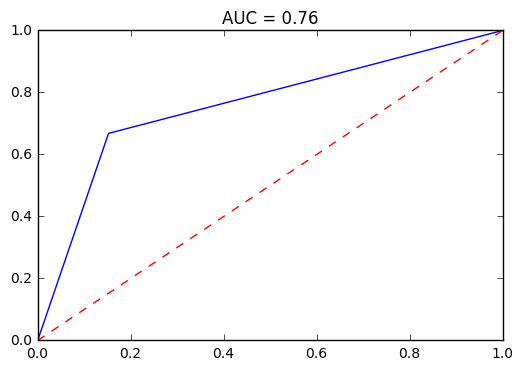

In [44]:
var_categoricas = ['pclass_3', 'pclass_2', 'sex_male']

X_train, X_test, y_train, y_test = train_test_split(titanic_vif[var_categoricas], titanic_vif['survived'], test_size=0.4)

classifier = LogisticRegression().fit(X_train, y_train)
y_pred     = classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[205  39]
 [ 51 123]]
Precisión: 0.784688995215
Exactitud: 0.759259259259
Exhaustividad: 0.706896551724
F1: 0.732142857143
AUC: 0.773530243075


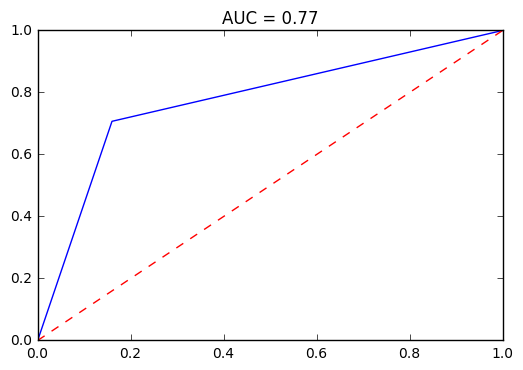

In [45]:
y_pred     = classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

El modelo de los datos de test es levemente menor que el de train

## Matriz de Confusion

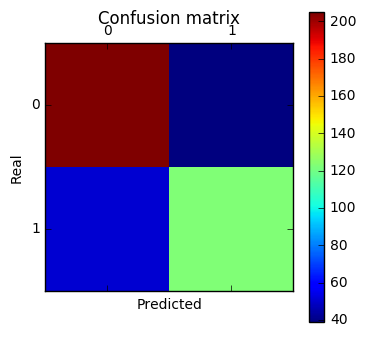

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

In [47]:
classifier.coef_

array([[-1.26328875, -0.55489161, -2.2463474 ]])

In [48]:
titanic_vif[var_categoricas].columns

Index([u'pclass_3', u'pclass_2', u'sex_male'], dtype='object')

**Se puede interpretar, con los coeficientes resultantes, que viajar en una mejor clase y el sexo, influyen en el supervivencia.**